In [1]:
import numpy as np
from numpy.linalg import norm, eigvals, inv
import matplotlib.pyplot as plt

### 1. Normas matriciales.

In [37]:
def vector_en_B(raiz=True):
    x = np.random.rand(3) - 0.5
    x /= norm(x, 2)
    x *= np.sqrt(np.random.rand())
    return x

In [38]:
def calcular_norma_2(A):
    s = 0
    terminos = [s]
    for i in range(100):
        x = vector_en_B()
        s = max(norm(A@x, 2)/norm(x, 2), s)
        terminos.append(s)
    return s, terminos

In [39]:
A = np.random.rand(3,3)
norma, sucesion = calcular_norma_2(A)

In [40]:
print("Norma calculada por la sucesion:", norma)
print("Norma segun numpy", norm(A, 2))

Norma calculada por la sucesion: 1.5347989798955681
Norma segun numpy 1.5358122906169844


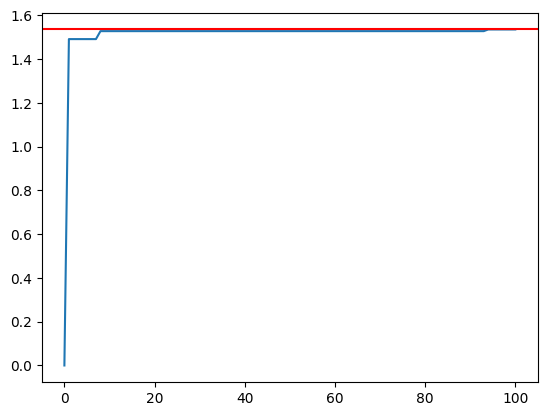

In [41]:
plt.plot(sucesion)
plt.axhline(norma, color = "red")

### 2. Resolucion de Ecuaciones

In [42]:
def L(A):
    return np.tril(A, -1)

def D(A):
    return np.diag(np.diag(A))
    
def U(A):
    return np.triu(A, 1)

In [43]:
def T_J(A):
    return -inv(D(A))@(L(A)+U(A))

def C_J(A, b):
    return inv(D(A))@b

In [54]:
def radio_espectral(A):
    return np.max(np.abs(eigvals(A)))

In [55]:
def metodo_J(A, b):
    T = T_J(A)
    C = C_J(A, b)
    
    x = np.random.rand(len(b))
    
    if radio_espectral(T) >= 1:
        print("Radio espectral mayor o igual que 1")
        return None
    
    for i in range(1000):
        x_next = T@x + C
        
        if (x_next == x).all():
            print("Se encontro punto fijo")
            return x
        
        x = x_next
        
    print("Se alcanzo maximo de iteraciones")
    return x

In [56]:
# Ejemplo 1
A = np.array([[3,1,1],[2,6,1],[1,1,4]])
b = np.array([5,9,6])
x = metodo_J(A, b)
print("Resultado de Ax:", A@x)

Se encontro punto fijo
Resultado de Ax: [5. 9. 6.]


In [57]:
# Ejemplo 2
A = np.array([[5,7,6,5],[7,10,8,7],[6,8,10,9], [5,7,9,10]])
b = np.array([23,32,33,31])
x = metodo_J(A, b)
print("Resultado de Ax:", A@x)

Radio espectral mayor o igual que 1


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

### 3. Resolucion de Ecuaciones

In [12]:
def newton_raphson(f, f_, x0, e, N):
    x = x0
    for i in range(N):
        x_next = x - f(x)/(f_(x))
        if abs(x_next - x) < e:
            return x    
        x = x_next
    print("No se alcanzo la convergencia")
    return None

In [13]:
def f(x):
    return pow(x, 15) - 2
    
def f_(x):
    return 15*pow(x, 14)

x0 = 1
e = 10e-3
N = 100
xr = newton_raphson(f, f_, x0, e, N)

print("Raiz encontrada:", xr)
print("f evaluada en raiz", f(xr))

Raiz encontrada: 1.0495733199381683
f evaluada en raiz 0.06629220177446937


### 4. Ecuaciones Diferenciales

In [14]:
def euler(f, x0, t0, tf, h):

    ts = [t0]
    xs = [x0]

    t = t0 + h
    x = x0

    while t < tf:
        x = x + h*f(t, x)

        ts.append(t)
        xs.append(x)

        t = t + h 

    return ts, xs

In [15]:
# Ecuación diferencial: x'(t) = 2*x(t)+1

def f(t, x):
    return 2*x+1

# Solución exacta de la ecuación diferencial
def solucion_exacta(t, x0):
    return (x0+0.5)*np.exp(2*t) - 0.5

In [16]:
ts_euler, xs_euler = euler(f, 1, 0, 1, h=0.01) 

In [17]:
ts_euler[-1], xs_euler[-1]

(0.9900000000000007, 10.15389135037108)

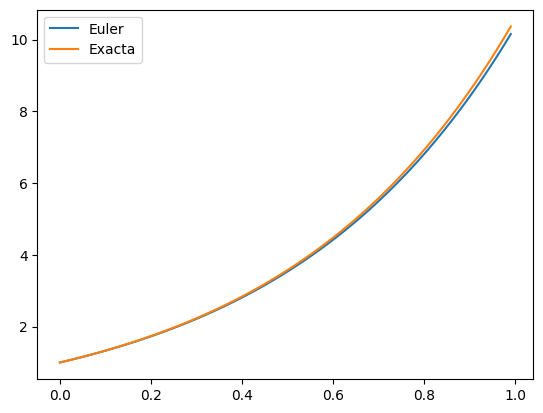

In [18]:
plt.plot(ts_euler, xs_euler, label="Euler")
plt.plot(ts_euler, [solucion_exacta(t, 1) for t in ts_euler], label="Exacta")
plt.legend()

### 5. Ecuaciones Diferenciales

In [20]:
def euler_orden_2(f, x0, t0, tf, h):

    ts = [t0]
    xs = [x0]

    t = t0 + h
    x = x0
    
    while t < tf:
        x = x + (h/2) * (f(t, x) + f(t + h, x + h * f(t, x)))
        
        ts.append(t)
        xs.append(x)

        t = t + h 
        
    return ts, xs

In [21]:
def taylor(f, f_, x0, t0, tf, h):

    ts = [t0]
    xs = [x0]

    t = t0 + h
    x = x0
    
    while t < tf:
        x = x + h*f(t, x) + (1/2)*(h**2)*(f_(t,x))
        
        ts.append(t)
        xs.append(x)

        t = t + h 

    return ts, xs

In [25]:
def f(t, x):
    return x

def f_(t, x):
    return x

def solucion_exacta(t, x0):
    return x0*np.exp(t)

In [35]:
hs = [0.1, 0.05, 0.01, 0.005, 0.001]
hs = np.linspace(0,1,100)
errores_euler = []
errores_taylor = []
for h in hs:
    tf = 1
    
    ts_euler, xs_euler = euler_orden_2(f, 1, 0, tf, h)
    ts_taylor, xs_taylor = taylor(f, f_, 1, 0 ,tf, h)

    errores_euler.append(abs(solucion_exacta(tf, 1) - xs_euler[-1]))
    errores_taylor.append(abs(solucion_exacta(tf, 1) - xs_taylor[-1]))

KeyboardInterrupt: 

In [ ]:
# Graficar log(EN) en función de log(h)
plt.scatter(-np.log(hs), np.log(errores_euler), label='Error Euler')
plt.scatter(-np.log(hs), np.log(errores_taylor), label='Error Taylor')
plt.xlabel('log(h)')
plt.ylabel('log(EN)')
plt.legend()

### 6. Cuadrados Minimos

In [133]:
def cuadrados_minimos(x, y, w):
    A = np.zeros((len(x), 2))
    y = np.sqrt(w)*y #element-wise

    for i in range(len(x)):
        raiz_wi = np.sqrt(w[i])
        A[i] = [raiz_wi*x[i], raiz_wi]
    
    a, b = np.linalg.solve(A.T@A, A.T@y)
    
    def ajuste(x):
        return a*x + b
    
    return ajuste

In [138]:
w = np.array([1, 0.5, 1, 0.5, 0.5])
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5.01, 7.02, 9.1, 11.1])

In [139]:
ajuste = cuadrados_minimos(x,y,w)

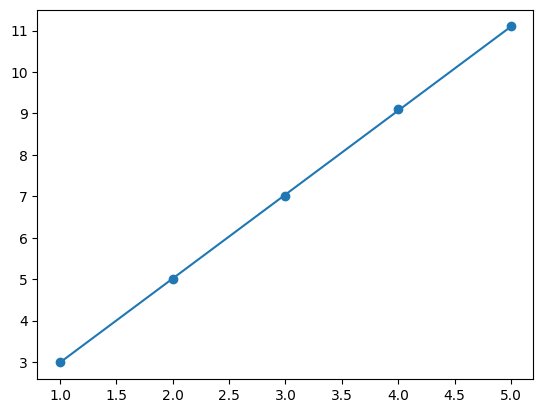

In [140]:
plt.scatter(x, y)
plt.plot(x, [ajuste(xi) for xi in x])

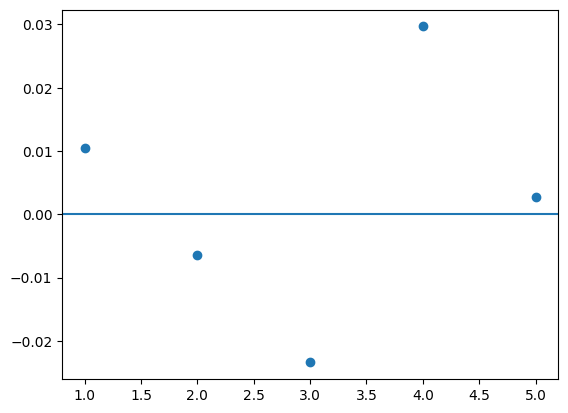

In [141]:
errores = [yi - ajuste(xi) for xi, yi in zip(x,y)]
plt.scatter(x, errores)
plt.axhline(0)

### 7. Integracion Numerica

In [244]:
def integral(f, a, b, n):
    intervalos = np.linspace(a, b, n)
    area = 0
    for i in range(len(intervalos) - 1):
        a, b = intervalos[i], intervalos[i+1]
        dA = (b-a)*(f(a) + f(b))/2 
        area += dA
    return area

In [245]:
def f(x):
    return 1/np.sqrt(1+x**2)

integral(f, 0, 1, 4)

0.878095660993877